In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay

from niave_algorithm_selection import run_evaluation


/var/folders/h7/fr7g30_x5x12d68ww_s6w2_m0000gn/T/ipykernel_90245/1047625139.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


 Macro Precision :  0.70, Recall :  0.94, F1 :  0.77
 Micro Precision :  0.96, Recall :  0.96, F1 :  0.96
 binary Precision :  0.40, Recall :  0.92, F1 :  0.56


/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/utils/niave_algorithm_selection.py:9: DtypeWarning: Columns (1,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


((0.6988015994989781, 0.9401509316144685, 0.768385119710363),
 (0.9610047604578142, 0.9610047604578142, 0.9610047604578142),
 (0.39993394980184943, 0.9181197877179682, 0.5571658615136876))

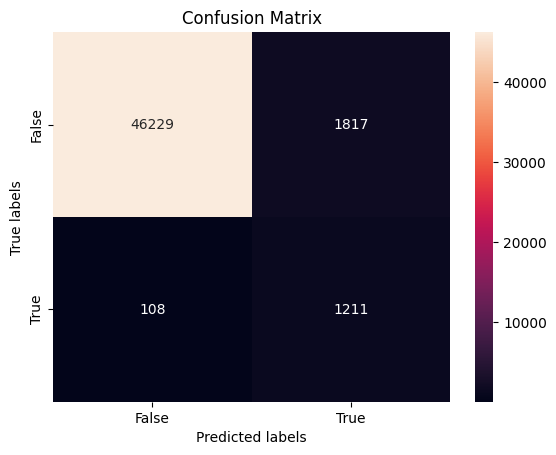

In [2]:
dataset = "real1_final"
generic_path = f"/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/data/raw_csv/{dataset}.csv"
run_evaluation(filepath =generic_path )

In [3]:
TP = 1211
TN = 46229
FP = 108 
FN = 1817

F1 = (2*TP)/(2*TP + FP + FN)
F1

0.5571658615136876

In [4]:
dataset = "syn2_final"
generic_path = f"/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/data/raw_csv/{dataset}.csv"
run_evaluation(filepath =generic_path )

/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/utils/niave_algorithm_selection.py:9: DtypeWarning: Columns (1,23,24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


ValueError: cannot convert float NaN to integer

In [7]:
dataset = "syn3_final"
generic_path = f"/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/data/raw_csv/{dataset}.csv"

df = pd.read_csv(
    generic_path,
    delimiter='\t'
    )

/var/folders/h7/fr7g30_x5x12d68ww_s6w2_m0000gn/T/ipykernel_88642/250258287.py:4: DtypeWarning: Columns (1,23,24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45206 entries, 0 to 45205
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        45206 non-null  int64  
 1   Chr               45206 non-null  object 
 2   START_POS_REF     45206 non-null  int64  
 3   END_POS_REF       45206 non-null  int64  
 4   REF               45070 non-null  object 
 5   ALT               45070 non-null  object 
 6   REF_MFVdVs        45070 non-null  object 
 7   ALT_MFVdVs        45070 non-null  object 
 8   Sample_Name       45070 non-null  object 
 9   FILTER_Mutect2    45070 non-null  object 
 10  FILTER_Freebayes  45070 non-null  object 
 11  FILTER_Vardict    45070 non-null  object 
 12  FILTER_Varscan    45070 non-null  object 
 13  m2_MQ             14935 non-null  float64
 14  m2_FS             14935 non-null  float64
 15  m2_MQ0            14935 non-null  float64
 16  m2_MQRankSum      14935 non-null  float6